In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [6]:
video_file = "test.mp4"

Read and display video frame by frame

In [7]:
def get_frames(filename):
    video = cv.VideoCapture(filename)
    while video.isOpened():
        rete,frame = video.read()
        if rete:
            yield frame
        else:
            break
        video.release()
        yield None


In [44]:
for f in get_frames(video_file):
    if f is None:
        break
    cv.imshow('frame',f)
    if cv.waitKey(10) == 40:
        break
cv.destroyAllWindows()

In [8]:
def get_frame(filename,index):
    counter = 0
    video = cv.VideoCapture(filename)
    while video.isOpened():
        rete,frame = video.read()
        if rete:
            if counter == index:
                return frame
            counter += 1
        else:
            break
    video.release()
    return None


Analyze video frame pixel using Numpy

In [9]:
frame = get_frame(video_file,45)
print('shape is ',frame.shape)
print('pixel at (60,21)',frame[60,21,:])
print('pixel at (120,10)',frame[120,10,:])

shape is  (720, 1280, 3)
pixel at (60,21) [8 8 8]
pixel at (120,10) [12  9  8]


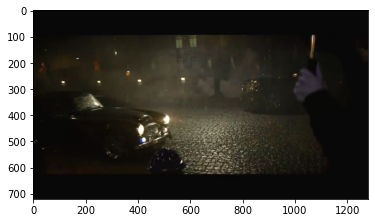

In [10]:
plt.imshow(frame)

Modifying video frame using Numpy

pixel at (120,10) [ 8  9 12]


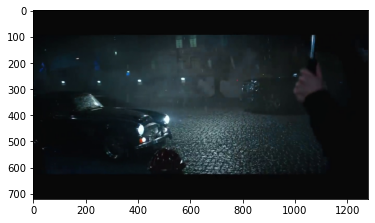

In [11]:
fix_frame = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
print('pixel at (120,10)',fix_frame[120,10,:])
plt.imshow(fix_frame)

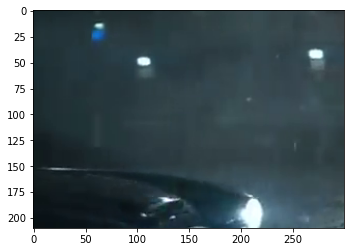

In [12]:
plt.imshow(fix_frame[220:430,300:600])

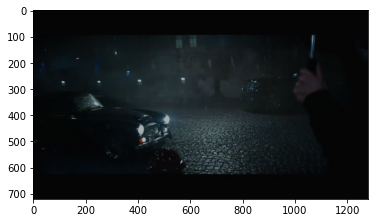

In [13]:
#adjusting brightness
adjust_brightness=0.7*fix_frame
adjust_brightness=adjust_brightness.astype(np.uint8)
plt.imshow(adjust_brightness)

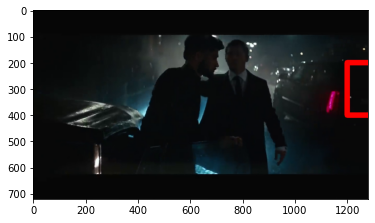

In [14]:
frame=get_frame(video_file,200)
cv.rectangle(frame,(1200,200),(1450,400),color=(0,0,255),thickness=20)
fixed_frame=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

In [20]:
#generating new video using FOURCC codec
fourcc = cv.VideoWriter_fourcc(*'MPV4')
video_out = cv.VideoWriter('new_video.mp4',fourcc,20,(480,270))
counter = 0
for frame in get_frames(video_file):
    if frame is None:
        break
    cv.putText(frame,text = str(counter),org=(100,100),
              fontFace = cv.FONT_HERSHEY_SIMPLEX,
              fontScale = 3,
              color= (0,255,0),
              thickness = 10)
    video_out.write(frame)
    counter += 1
    
video_out.release()